In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time

sns.set_theme()

In [4]:
file_path: str = "data/DC internal users (003).xlsx"


df = pd.read_excel(file_path)

df["N-3"] = df["Team name"].apply(lambda x: " ".join(x.split()[:3]) if isinstance(x, str) else x)

In [5]:
df_n_1 = df.groupby(by="N-1").count().sort_values(by="N-2", ascending=False)
df_n_1 = df.groupby(by="N-1").count().sort_values(by="N-2", ascending=False)

In [6]:
pal_n_1 = sns.color_palette("Blues_d", len(df_n_1))


In [16]:
pal_n_1 = sns.color_palette("Blues_d", len(df_n_1))

df_n_1_keys = list(df_n_1["N-2"].index)
df_n_1_values = list(df_n_1["N-2"].values)

df_n_1_values = list(filter(lambda x: x >= 10, df_n_1_values))
df_n_1_keys = df_n_1_keys[:len(df_n_1_values)]


i = 0
a = 0
anchor = 999999
args_n_1 = []
for item in np.array(df_n_1_values):
    args_n_1.append(i)
    if item < anchor:
        anchor = item
        i += 1


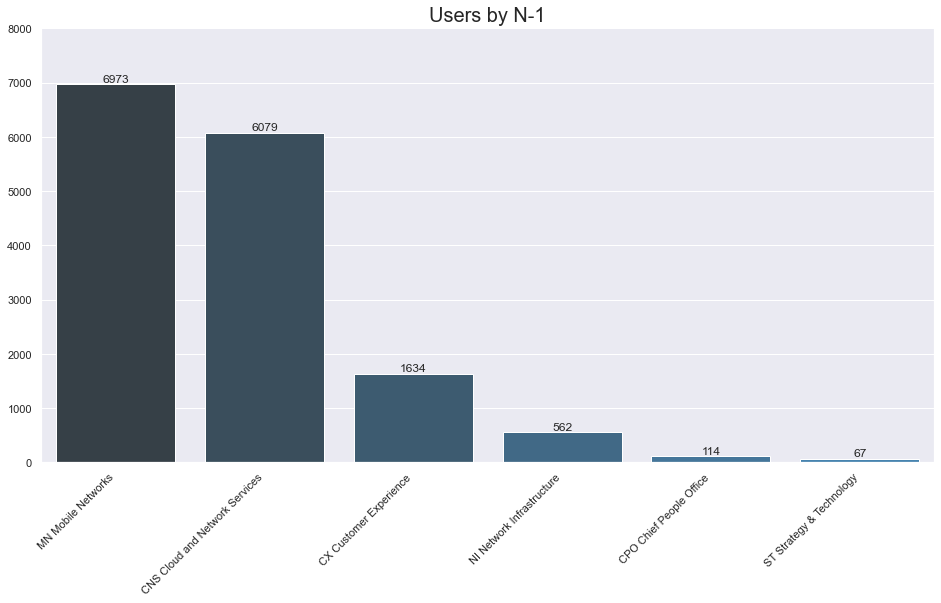

In [20]:
fig = plt.figure(figsize=(16, 8))
graph = sns.barplot(x = df_n_1_keys, y = df_n_1_values, palette= np.array(pal_n_1[::-1])[args_n_1])
graph.set_title("Users by N-1", fontsize=20)
ax = plt.gca()
plt.ylim(0, max(df_n_1_values) + max(df_n_1_values) * 0.15)
ax.bar_label(ax.containers[0], labels =["{}".format(val) for val in df_n_1_values])
graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig("n_1.png")
plt.show()

df_s = pd.DataFrame({"N-1": df_n_1_keys, "Users": df_n_1_values})
df_s.to_excel("n_1.xlsx")

# Per N-2

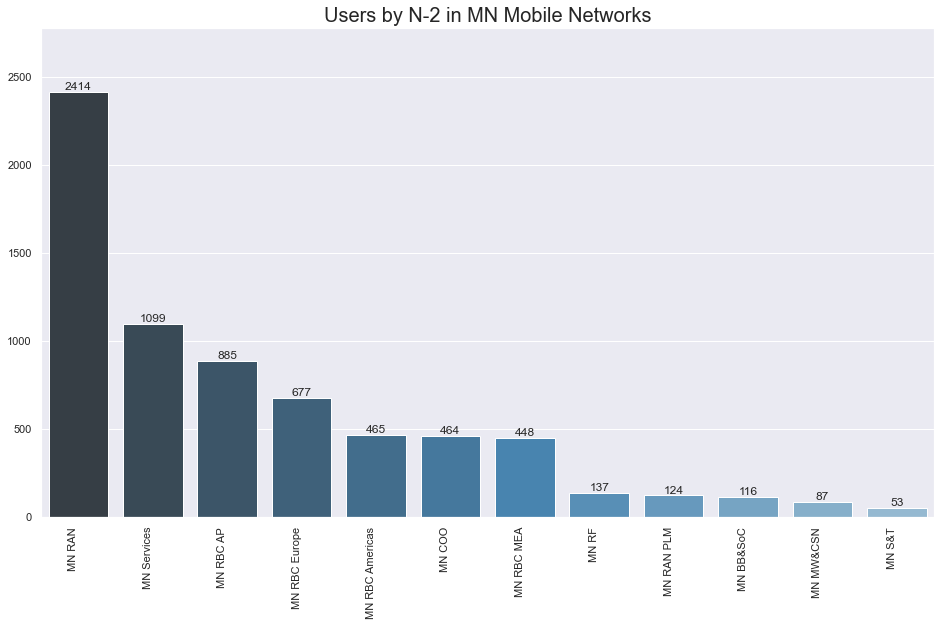

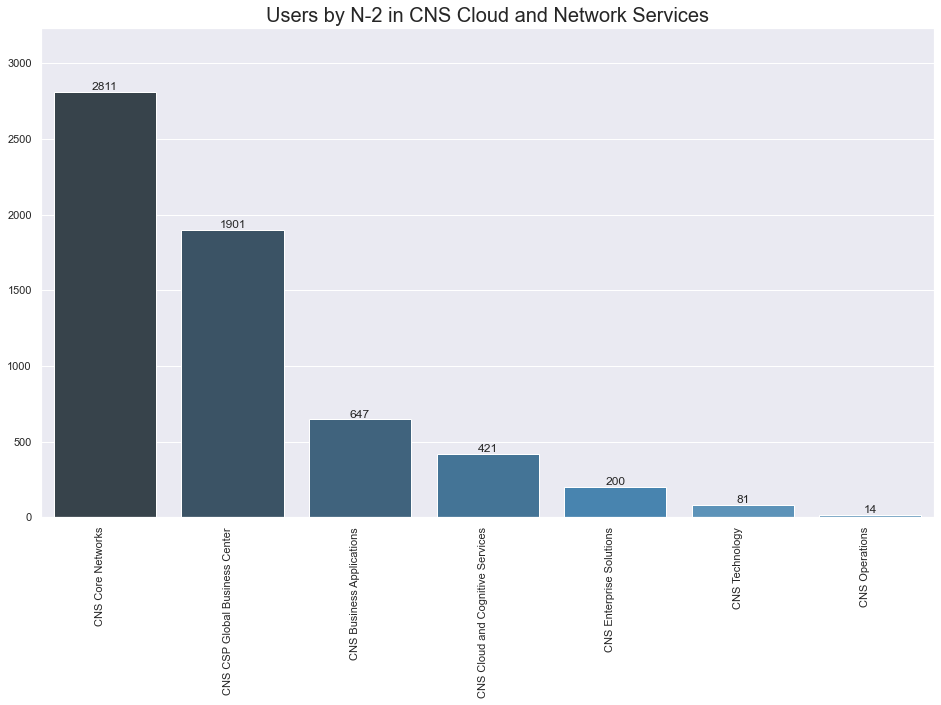

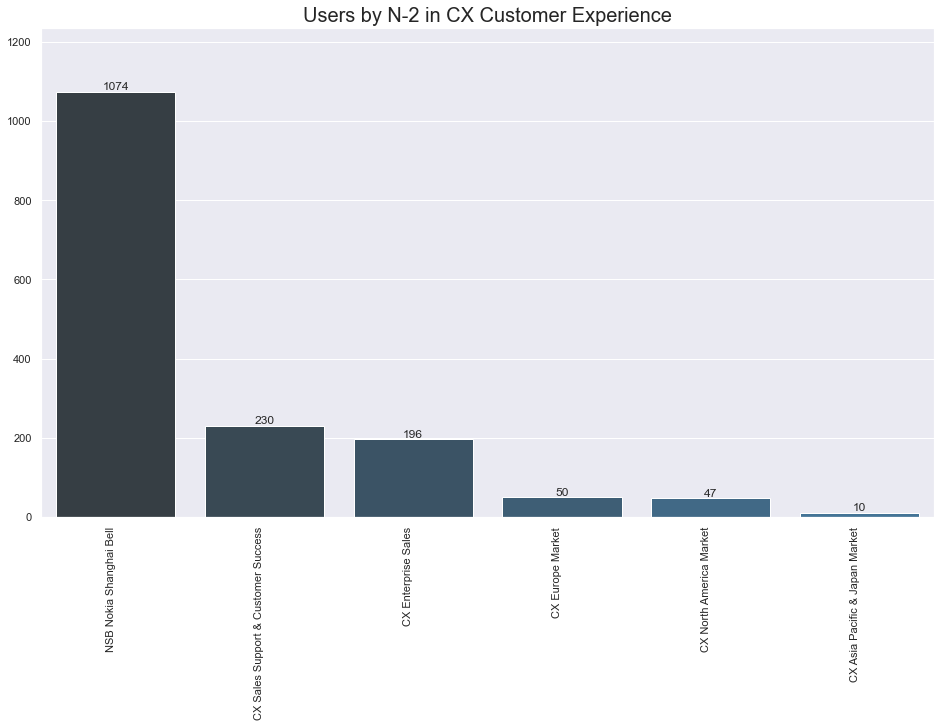

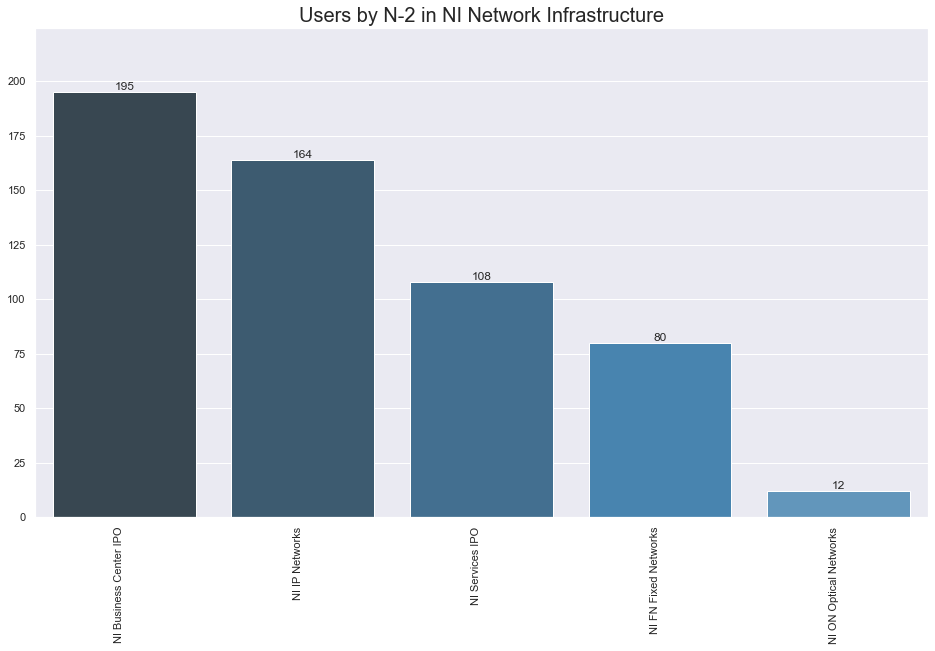

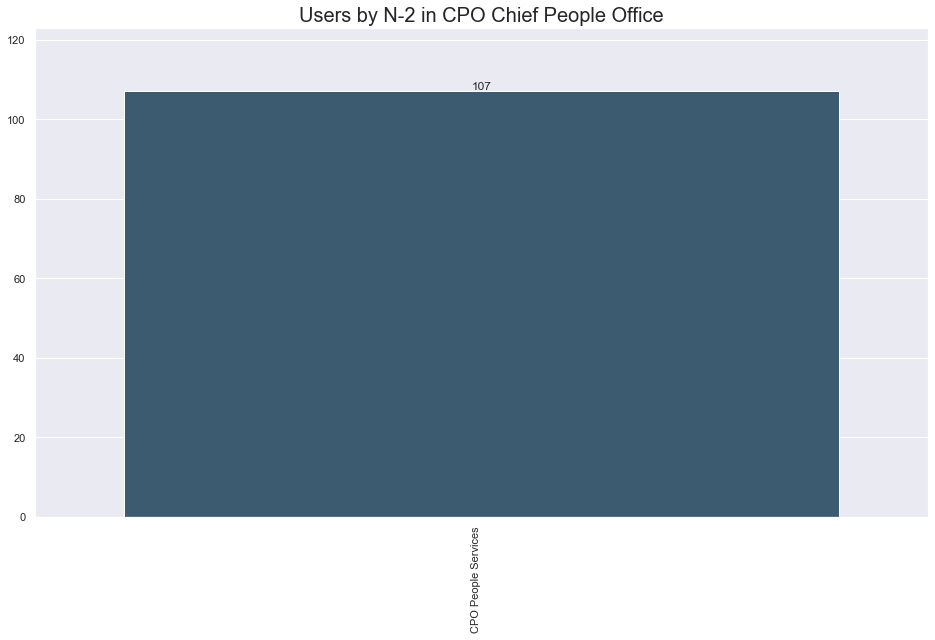

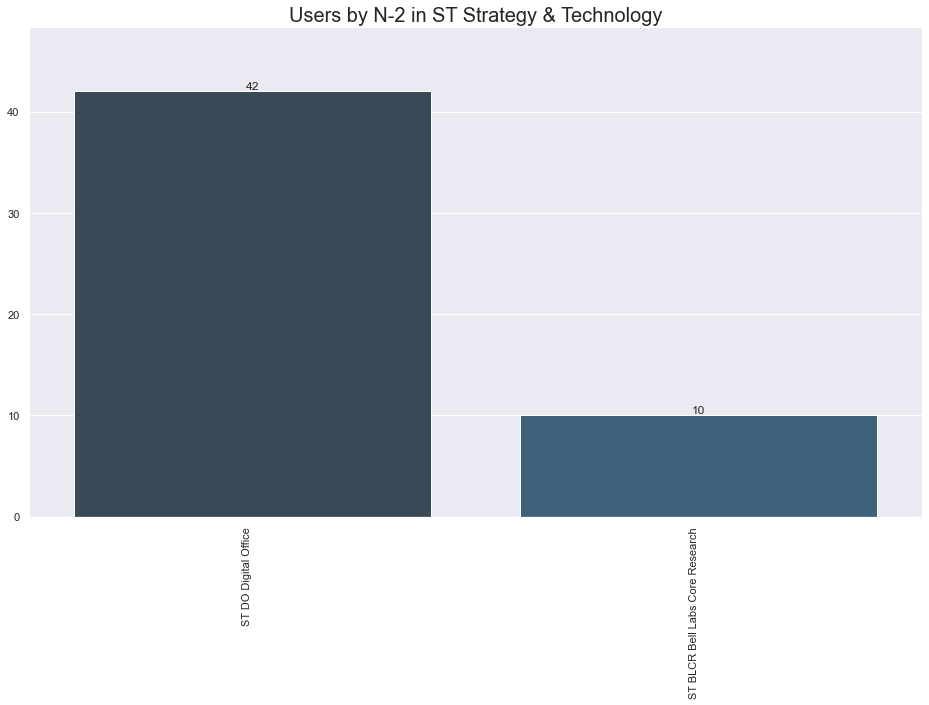

In [25]:
dfs_n2 = {}

for bg in df_n_1_keys:
    dfs_n2[bg] = {"df": df[df["N-1"] == bg]}
    dfs_n2[bg]["df_n2_gr"] = dfs_n2[bg]["df"].groupby(by="N-2").count().sort_values(by="N-3", ascending=False)["N-3"]
    dfs_n2[bg]["df_n2_gr_keys"]= list(dfs_n2[bg]["df_n2_gr"].index)
    dfs_n2[bg]["df_n2_gr_values"] = list(dfs_n2[bg]["df_n2_gr"].values)

    dfs_n2[bg]["df_n2_gr_values"] = list(filter(lambda x: x >= 10, dfs_n2[bg]["df_n2_gr_values"]))
    dfs_n2[bg]["df_n2_gr_keys"] = dfs_n2[bg]["df_n2_gr_keys"][:len(dfs_n2[bg]["df_n2_gr_values"])]
    

    pal_n_2 = sns.color_palette("Blues_d", len(dfs_n2[bg]["df_n2_gr"]))
    i = 0
    anchor = 999999
    args_n_2 = []
    for item in np.array(dfs_n2[bg]["df_n2_gr_values"]):
        args_n_2.append(i)
        if item < anchor:
            anchor = item
            i += 1

    fig = plt.figure(figsize=(16, 9))
    graph = sns.barplot(x = dfs_n2[bg]["df_n2_gr_keys"], y = dfs_n2[bg]["df_n2_gr_values"], palette= np.array(pal_n_2[::-1])[args_n_2])
    graph.set_title(f"Users by N-2 in {bg}", fontsize=20)
    ax = plt.gca()
    plt.ylim(0, max(dfs_n2[bg]["df_n2_gr_values"]) + max(dfs_n2[bg]["df_n2_gr_values"]) * 0.15)
    ax.bar_label(ax.containers[0], labels =["{}".format(val) for val in dfs_n2[bg]["df_n2_gr_values"]])
    graph.set_xticklabels(graph.get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.savefig(f"n_2_{bg}.png")
    plt.show()
    df_s = pd.DataFrame({"N-2": dfs_n2[bg]["df_n2_gr_keys"], "Users": dfs_n2[bg]["df_n2_gr_values"]})
    df_s.to_excel(f"n_2_{bg}.xlsx")

    time.sleep(2)

# Per N-3 in MN

In [27]:
df_n3_mn = dfs_n2["MN Mobile Networks"]["df"].groupby(by="N-3").count().sort_values(by="N-2", ascending=False)["N-1"]

In [28]:
df_n_3_keys = list(df_n3_mn.index)
df_n_3_values = list(df_n3_mn.values)

df_n_3_values = list(filter(lambda x: x > 10, df_n_3_values))
df_n_3_keys = df_n_3_keys[:len(df_n_3_values)]


i = 0
a = 0
anchor = 999999
args_n_3 = []
for item in np.array(df_n_3_values):
    args_n_3.append(i)
    if item < anchor:
        anchor = item
        i += 1


In [33]:
len(df_n_3_values)

40

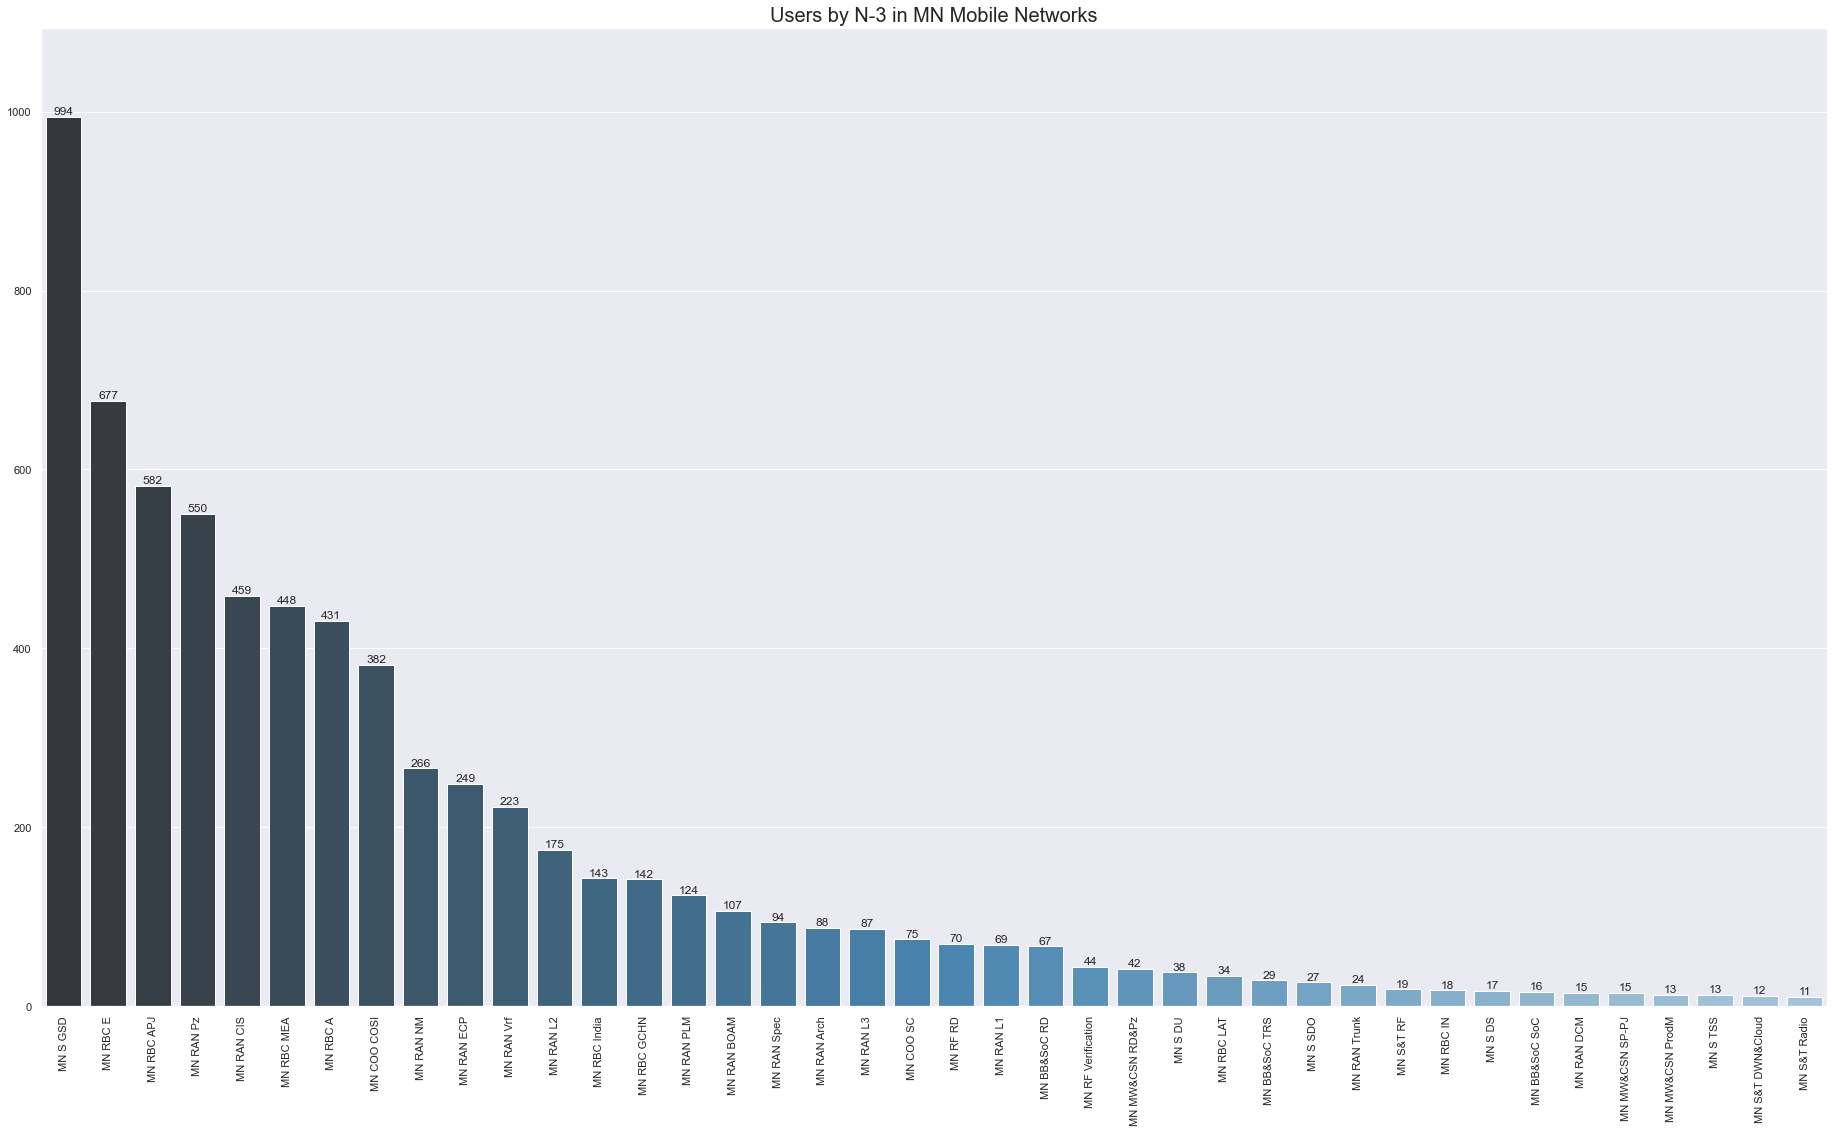

In [35]:
pal_n_3 = sns.color_palette("Blues_d", len(df_n_3_values))

fig = plt.figure(figsize=(32, 18))
graph = sns.barplot(x = df_n_3_keys, y = df_n_3_values, palette= np.array(pal_n_3[::-1])[args_n_3])
graph.set_title("Users by N-3 in MN Mobile Networks", fontsize=20)
ax = plt.gca()
plt.ylim(0, max(df_n_3_values) + max(df_n_3_values) * 0.1)
ax.bar_label(ax.containers[0], labels =["{}".format(val) for val in df_n_3_values])
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.savefig("n_3.png")
plt.show()

df_s = pd.DataFrame({"N-3": df_n_3_keys, "Users": df_n_3_values})
df_s.to_excel(f"n_3.xlsx")